In [194]:
#Author : Noam Karasso
#Score : 100
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# 1.

In [195]:
df = pd.read_csv('/content/sample_data/car_evaluation.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1728 non-null   int64 
 1   buying      1728 non-null   object
 2   maint       1728 non-null   object
 3   door        1728 non-null   object
 4   persons     1728 non-null   object
 5   lug_boot    1728 non-null   object
 6   safety      1728 non-null   object
 7   class       1728 non-null   object
dtypes: int64(1), object(7)
memory usage: 108.1+ KB


In [196]:
df.drop(df.columns[0],axis=1, inplace=True)
df.head(5)

,buying,maint,door,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [197]:
df.tail(5)

,buying,maint,door,persons,lug_boot,safety,class
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good
1727,low,low,5more,more,big,high,vgood


In [198]:
df.shape

(1728, 7)

In [199]:
df.value_counts("buying")

buying
high     432
low      432
med      432
vhigh    432
dtype: int64

In [200]:
df.value_counts("maint")

maint
high     432
low      432
med      432
vhigh    432
dtype: int64

In [201]:
df.value_counts("door")

door
2        432
3        432
4        432
5more    432
dtype: int64

In [202]:
df.value_counts("persons")

persons
2       576
4       576
more    576
dtype: int64

In [203]:
df.value_counts("lug_boot")

lug_boot
big      576
med      576
small    576
dtype: int64

In [204]:
df.value_counts("safety")

safety
high    576
low     576
med     576
dtype: int64

In [205]:
df.value_counts("class")

class
unacc    1210
acc       384
good       69
vgood      65
dtype: int64

In [206]:
missing_data = pd.DataFrame({'total_missing': df.isnull().sum(), 'perc_missing': (df.isnull().sum()/1728)*100})
missing_data

,total_missing,perc_missing
buying,0,0.0
maint,0,0.0
door,0,0.0
persons,0,0.0
lug_boot,0,0.0
safety,0,0.0
class,0,0.0


# 2.

In [207]:
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]
encoder = LabelEncoder()

for column in X:
    X.loc[:, column] = encoder.fit_transform(X.loc[:, column])

Y = encoder.fit_transform(Y)

<ipython-input-207-0936eb66a295>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, column] = encoder.fit_transform(X.loc[:, column])
<ipython-input-207-0936eb66a295>:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X.loc[:, column] = encoder.fit_transform(X.loc[:, column])
<ipython-input-207-0936eb66a295>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

# 3.

In [208]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state = 42)

#4-6

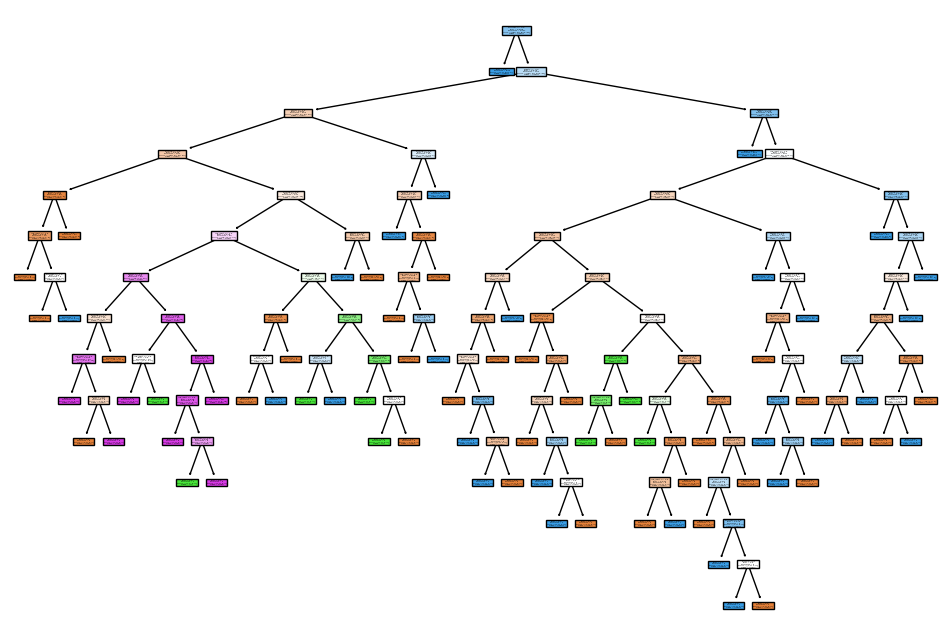

Accuracy:96.67%
Confusion Matrix:


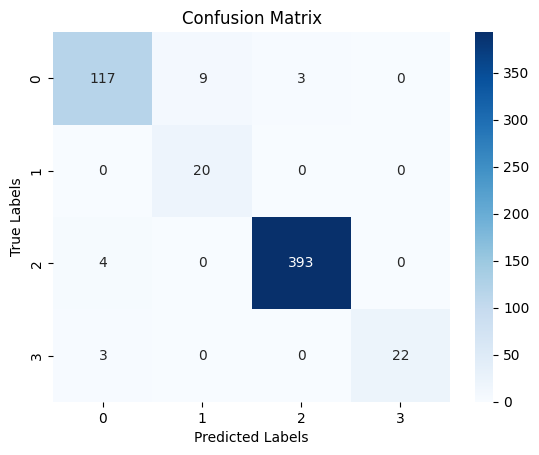

In [209]:
#classification
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
plt.figure(figsize=(12,8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names = df['class'].unique())
plt.show()

#evaluating the quality of a model’s predictions
y_pred = clf.predict(x_test)
print('Accuracy:{0:.4}%'.format(accuracy_score(y_test,y_pred)*100))
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")

plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

#7-9

Accuracy:96.67%
Confusion Matrix:


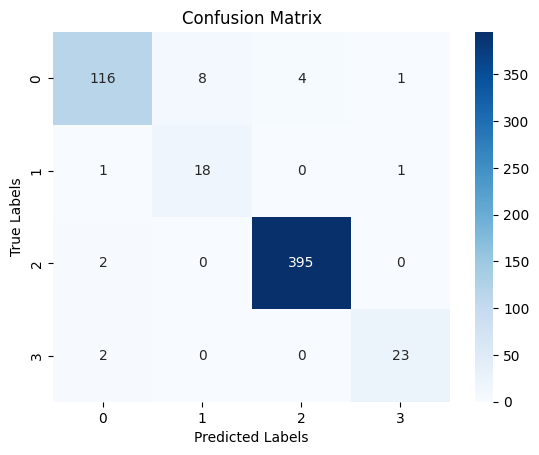

In [212]:
#classification
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(x_train, y_train)

#evaluating the quality of a model’s predictions
y_pred = random_forest.predict(x_test)
print('Accuracy:{0:.4}%'.format(accuracy_score(y_test,y_pred)*100))
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")

plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

with open('RandomForestClassifier.pkl', 'wb') as file:
    pickle.dump(random_forest, file)

#10-12

Accuracy:97.37%
Confusion Matrix:


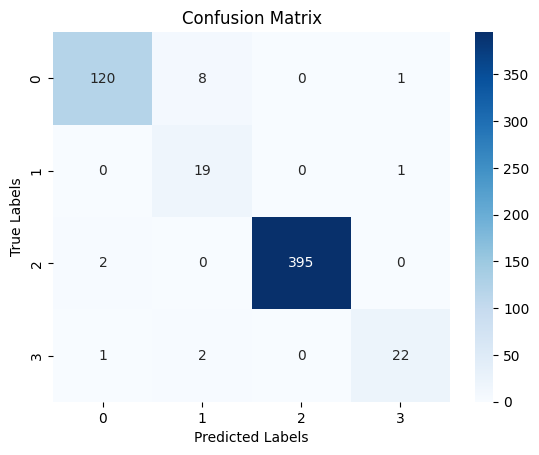

In [211]:
#classification
XGB = XGBClassifier()
XGB.fit(x_train, y_train)

#evaluating the quality of a model’s predictions
y_pred = XGB.predict(x_test)
print('Accuracy:{0:.4}%'.format(accuracy_score(y_test,y_pred)*100))
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")

plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

with open('XGBClassifier.pkl', 'wb') as file:
    pickle.dump(XGB, file)